<center><h1>Pandas</h1></center>

### What is Pandas

Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language.

https://pandas.pydata.org/about/index.html

### Pandas Series

A Pandas Series is like a column in a table. It is a 1-D array holding data of any type.

### Importing Pandas

In [1]:
import numpy as np
import pandas as pd

### Series from lists

In [3]:
# string
country = ["India", "Nepal", "USA", "Pakistan"]

pd.Series(country)

0       India
1       Nepal
2         USA
3    Pakistan
dtype: object

Series object have 2 things:  
1- Value  
2- Indexes  
  
  dtype of the string is object in the series

In [ ]:
# integers

runs = [13, 24, 56, 78, 100]

pd.Series(runs)

0     13
1     24
2     56
3     78
4    100
dtype: int64

In [ ]:
runs = [13, 24, 56, 78, 100, "Ali Zain"]

runs = pd.Series(runs)

In [ ]:
# custom index


marks = [67, 57, 89, 100]
subjects = ["maths", "english", "science", "hindi"]

pd.Series(marks, index=subjects)

maths       67
english     57
science     89
hindi      100
dtype: int64

In [ ]:
# setting a name

marks = [67, 57, 89, 100]
subjects = ["maths", "english", "science", "hindi"]

marks = pd.Series(marks, index=subjects, name="Ali Zain marks")

marks

maths       67
english     57
science     89
hindi      100
Name: Ali Zain marks, dtype: int64

In [ ]:
# Create a series where each element is a list
data = pd.Series([[1, 2, 3], [4, 5], [6, 7, 8, 9]])

print(data)

0       [1, 2, 3]
1          [4, 5]
2    [6, 7, 8, 9]
dtype: object


### Series from dict

In [ ]:
marks = {"maths": 67, "english": 57, "science": 89, "hindi": 100}


marks_series = pd.Series(marks, name="Ali Zain marks")
marks_series

maths       67
english     57
science     89
hindi      100
Name: Ali Zain marks, dtype: int64

In [ ]:
marks = {"maths": 67, "english": 57, "science": 89, "hindi": 100}

subjects = ["english", "maths", "science", "hindi"]
marks_series = pd.Series(marks, index=subjects, name="Ali Zain marks")
marks_series

english     57
maths       67
science     89
hindi      100
Name: Ali Zain marks, dtype: int64

Below is a detailed explanation about creating a Pandas Series from a dictionary and how the custom index parameter works.

---

# **Creating a Pandas Series from a Dictionary**

A **Pandas Series** is a one-dimensional labeled array that can hold any data type. One common way to create a Series is by passing a dictionary to the `pd.Series()` constructor. When you do this, the keys of the dictionary become the labels (indices) and the corresponding values become the data.

### **Basic Example**
```python
import pandas as pd

marks = {"maths": 67, "english": 57, "science": 89, "hindi": 100}
marks_series = pd.Series(marks, name="Ali Zain marks")
print(marks_series)
```

**Output:**
```
maths      67
english    57
science    89
hindi     100
Name: Ali Zain marks, dtype: int64
```
- **What happens?**  
  The keys (`"maths"`, `"english"`, etc.) become the Series’ index automatically, and the values become the data.

---

# **Using a Custom Index**

You can override the default behavior by providing an explicit list (or array) to the `index` parameter. This custom index defines the order and the exact labels that you want in your Series. When you supply a custom index, Pandas will look up each label in the provided index in the dictionary:

- **If the label is present in the dictionary:**  
  The corresponding value is assigned to that label.
- **If the label is missing in the dictionary:**  
  The value for that label will be `NaN` (Not a Number), which represents a missing value.

### **Example with Custom Index**
```python
import pandas as pd

marks = {"maths": 67, "english": 57, "science": 89, "hindi": 100}
subjects = ['123', 'english', 'science', 'hindi']  # '123' is not a key in marks

marks_series = pd.Series(marks, index=subjects, name="Ali Zain marks")
print(marks_series)
```

**Output:**
```
123          NaN
english     57.0
science     89.0
hindi      100.0
Name: Ali Zain marks, dtype: float64
```

### **Explanation:**
- The provided index is `['123', 'english', 'science', 'hindi']`.
- Pandas checks each element in the provided index against the keys in the dictionary:
  - For `'123'`: Since this key is not present in the `marks` dictionary, the value becomes `NaN`.
  - For `'english'`, `'science'`, and `'hindi'`: These keys are found in the dictionary, so their values (57, 89, 100) are used.
- As a result, the Series displays `NaN` for the label `'123'`.

---

# **Why Use a Custom Index?**

1. **Ordering:**  
   You might want the data in a specific order that is different from the natural (alphabetical or insertion) order of the dictionary keys.

2. **Filtering:**  
   You might want to include only a subset of the dictionary's keys. Labels not found in the dictionary will yield `NaN`.

3. **Label Standardization:**  
   Sometimes you have external labels (e.g., from another dataset) and you want to align your Series with those labels.

---

# **Additional Notes on Series Creation**

- **Extra Dictionary Keys:**  
  If the dictionary contains keys that are not in the custom index, they are ignored.
  ```python
  marks = {"maths": 67, "english": 57, "science": 89, "hindi": 100, "geography": 75}
  subjects = ['english', 'science', 'hindi']
  marks_series = pd.Series(marks, index=subjects)
  print(marks_series)
  ```
  **Output:**
  ```
  english    57
  science    89
  hindi     100
  dtype: int64
  ```
  - Here, the `"maths"` and `"geography"` entries are not used because they're not in the custom index.

- **Data Type Conversion:**  
  When using a custom index, if some keys are missing, the resulting Series usually has a floating-point type (`float64`) to accommodate `NaN` values, even if the original values were integers.
  
  ```python
  marks = {"maths": 67, "english": 57, "science": 89, "hindi": 100}
  subjects = ['123', 'english', 'science', 'hindi']
  marks_series = pd.Series(marks, index=subjects)
  print(marks_series.dtype)  # Output: float64
  ```

---

# **Summary**

- **Creating a Series from a Dictionary:**
  - By default, dictionary keys become the Series index.
  
- **Using the `index` Parameter:**
  - The provided custom index determines the Series labels.
  - If a label in the custom index isn’t in the dictionary, its value becomes `NaN`.
  - Any extra keys in the dictionary that are not in the index are ignored.
  
- **Benefits of Custom Indexing:**
  - Allows for specific ordering and filtering.
  - Ensures consistency with external data labels.
  
- **Important Note on Data Types:**
  - Missing values (`NaN`) force the Series to use a floating-point data type.

By understanding these points, you'll be well-equipped to create Pandas Series with custom indexing and handle missing values appropriately. This makes it easier to align your data with external sources and perform further analysis in a structured way.

### Series Attributes

In [32]:
# size => tells the number of items in the series
marks_series.size

4

In [33]:
# dtype
marks_series.dtype

dtype('int64')

In [34]:
# name
marks_series.name

'Ali Zain marks'

In [ ]:
# is_unique

print(marks_series.is_unique)

pd.Series([1, 1, 2, 3, 6, 4]).is_unique

True


False

In [ ]:
# index => Index object ko return karta hai
marks_series.index

Index(['english', 'maths', 'science', 'hindi'], dtype='object')

In [ ]:
runs = [13, 24, 56, 78, 100, "Ali Zain"]

runs = pd.Series(runs)

print(runs.index)
print(type(runs.index))

RangeIndex(start=0, stop=6, step=1)
<class 'pandas.core.indexes.range.RangeIndex'>


In [ ]:
# values => return ndarray of values

print(marks_series.values)
print(type(marks_series.values))

[ 57  67  89 100]
<class 'numpy.ndarray'>


### Series using read_csv

In [ ]:
# with one col
pd.read_csv("subs.csv")  # ==> this is imported not as a series but as a Data Frame
type(pd.read_csv("subs.csv"))

pandas.core.frame.DataFrame

In [ ]:
subs = pd.read_csv("subs.csv").squeeze()
print(subs)
type(pd.read_csv("subs.csv").squeeze())

0       48
1       57
2       40
3       43
4       44
      ... 
360    231
361    226
362    155
363    144
364    172
Name: Subscribers gained, Length: 365, dtype: int64


pandas.core.series.Series

In [ ]:
# with two cols

vk = pd.read_csv("kohli_ipl.csv", index_col="match_no").squeeze()

vk

match_no
1       1
2      23
3      13
4      12
5       1
       ..
211     0
212    20
213    73
214    25
215     7
Name: runs, Length: 215, dtype: int64

In [ ]:
vk = vk.copy()

vk

In [ ]:
movies = pd.read_csv("bollywood.csv", index_col="movie").squeeze()

movies

movie
Uri: The Surgical Strike                   Vicky Kaushal
Battalion 609                                Vicky Ahuja
The Accidental Prime Minister (film)         Anupam Kher
Why Cheat India                            Emraan Hashmi
Evening Shadows                         Mona Ambegaonkar
                                              ...       
Hum Tumhare Hain Sanam                    Shah Rukh Khan
Aankhen (2002 film)                     Amitabh Bachchan
Saathiya (film)                             Vivek Oberoi
Company (film)                                Ajay Devgn
Awara Paagal Deewana                        Akshay Kumar
Name: lead, Length: 1500, dtype: object

### Series Methods

In [ ]:
# head and tail => give you the preview of your data

subs.head()  # => by default gives you 5 tops rows

0    48
1    57
2    40
3    43
4    44
Name: Subscribers gained, dtype: int64

In [ ]:
vk.head(3)  # => specific top rows

match_no
1     1
2    23
3    13
Name: runs, dtype: int64

In [76]:
# tail  ==> gives you top 5 bottom rows

subs.tail()

360    231
361    226
362    155
363    144
364    172
Name: Subscribers gained, dtype: int64

In [79]:
vk.tail(10)

match_no
206     0
207     0
208     9
209    58
210    30
211     0
212    20
213    73
214    25
215     7
Name: runs, dtype: int64

In [ ]:
# sample => return a random rows from the data

vk.sample(5)

match_no
77       1
33      13
8        0
144     57
126    109
Name: runs, dtype: int64

In [93]:
movies.sample()

movie
No Smoking (2007 film)    John Abraham
Name: lead, dtype: object

Use sample when there is a bias in your dataset

In [ ]:
# value_counts => movies => freq count nikalta hai

movies.value_counts()

lead
Akshay Kumar        48
Amitabh Bachchan    45
Ajay Devgn          38
Salman Khan         31
Sanjay Dutt         26
                    ..
Diganth              1
Parveen Kaur         1
Seema Azmi           1
Akanksha Puri        1
Edwin Fernandes      1
Name: count, Length: 566, dtype: int64

In [105]:
# sort_values => inplace

vk.sort_values()

match_no
87       0
211      0
207      0
206      0
91       0
      ... 
164    100
120    100
123    108
126    109
128    113
Name: runs, Length: 215, dtype: int64

In [ ]:
vk.sort_values(ascending=False)  # in decending order

match_no
128    113
126    109
123    108
164    100
120    100
      ... 
93       0
211      0
130      0
8        0
135      0
Name: runs, Length: 215, dtype: int64

In [ ]:
vk.sort_values(ascending=False).head(10).values

array([113, 109, 108, 100, 100,  99,  93,  92,  90,  84], dtype=int64)

In [115]:
vk

match_no
1       1
2      23
3      13
4      12
5       1
       ..
211     0
212    20
213    73
214    25
215     7
Name: runs, Length: 215, dtype: int64

In [ ]:
# inplace parameter is used to permanently save the sorted series

vk.sort_values(inplace=True)
vk

match_no
87       0
211      0
207      0
206      0
91       0
      ... 
164    100
120    100
123    108
126    109
128    113
Name: runs, Length: 215, dtype: int64

Below is a detailed explanation of the error you encountered, along with notes on the underlying concept behind the `inplace` parameter and the idea of "views" versus "copies" in Pandas.

---

# **Understanding the `inplace` Parameter and Views in Pandas**

## **1. The `inplace` Parameter in Pandas**

- **Purpose:**  
  The `inplace` parameter (used in methods like `sort_values`, `drop`, etc.) tells Pandas whether to modify the object directly (in-place) or to return a new object with the changes.  
  - **`inplace=True`**: The object is modified directly; no new object is created.  
  - **`inplace=False`** (default in many functions): A new object is returned, leaving the original unchanged.

- **Usage Example:**
  ```python
  # Without inplace (returns a new Series)
  sorted_series = vk.sort_values()
  
  # With inplace (attempts to modify vk directly)
  vk.sort_values(inplace=True)
  ```

## **2. Views vs. Copies in Pandas**

### **What is a View?**
- A **view** is an object that **references the same underlying data** as another object.  
- When you create a view, you don’t make a full copy of the data; instead, the view **points to the same memory location** as the original.  
- Changes to a view might affect the original data, which can lead to unintended side effects.

### **What is a Copy?**
- A **copy** is a new object that contains its **own separate data**.  
- Modifications to a copy do **not** affect the original object.
- In Pandas, you can create a copy explicitly using the `.copy()` method.

### **Example: View vs. Copy**
```python
import pandas as pd
import numpy as np

# Create an original DataFrame
df = pd.DataFrame(np.arange(12).reshape(3,4), columns=list('ABCD'))

# Create a view (may happen in some operations)
view_df = df[['A', 'B']]  # This often creates a view, not a deep copy
view_df.iloc[0,0] = 100  # This may affect the original df

# Create an explicit copy
copy_df = df[['A', 'B']].copy()
copy_df.iloc[0,0] = 200  # This will not affect the original df
```

## **3. The Error: "This Series is a view of some other array"**

### **Error Explanation:**
- The error you encountered:
  ```
  ValueError: This Series is a view of some other array, to sort in-place you must create a copy
  ```
  indicates that the Series `vk` you are trying to sort **is not a standalone object**; it is a **view** on some other underlying data.
  
- **Why is In-Place Sorting Disallowed on Views?**
  - When a Series is a view, modifying it in-place could lead to **unexpected behavior** or **data integrity issues** because the same data may be referenced elsewhere.
  - To prevent these side effects, Pandas raises a `ValueError` when you try to modify a view in-place.

### **How to Fix the Error:**
- **Create a Copy First:**
  ```python
  vk_copy = vk.copy()
  vk_copy.sort_values(inplace=True)
  ```
  Now, you sort the copy, leaving the original view intact.
  
- **Or, Assign the Sorted Series:**
  ```python
  vk = vk.sort_values()
  ```
  This assigns the sorted result to `vk`, replacing the view with a new, sorted Series.

---

## **4. Why Does Pandas Create Views?**
- Pandas often creates views to **save memory** and **increase performance** when subsetting data.  
- However, this means that sometimes you have to be careful when performing in-place operations because the object you’re working with may not "own" its data.

---

## **5. Summary**
- **`inplace=True`** modifies the object directly, but only if the object **owns its data**.
- A **view** references the same data as its parent; modifying it in-place could cause unexpected changes elsewhere.
- Pandas prevents in-place modification on views to avoid these side effects by raising a **ValueError**.
- **Solution:** Create an explicit copy using `.copy()` or assign the sorted result to a new variable.

Understanding these concepts is crucial for working effectively with Pandas, especially when dealing with large datasets or complex data manipulation tasks. If you have further questions, feel free to ask!

In [ ]:
# sort_index => inplace => movies

movies.sort_index()  # inplace => save the sorted series in the original series

movie
1920 (film)                   Rajniesh Duggall
1920: London                     Sharman Joshi
1920: The Evil Returns             Vicky Ahuja
1971 (2007 film)                Manoj Bajpayee
2 States (2014 film)              Arjun Kapoor
                                   ...        
Zindagi 50-50                      Veena Malik
Zindagi Na Milegi Dobara        Hrithik Roshan
Zindagi Tere Naam           Mithun Chakraborty
Zokkomon                       Darsheel Safary
Zor Lagaa Ke...Haiya!            Meghan Jadhav
Name: lead, Length: 1500, dtype: object

### Series Maths Methods

In [ ]:
# count => same as size but, count doesn't count the missing values

vk.count()  # => total number of items present in the series

215

In [135]:
# sum -> product

subs.sum()

49510

In [151]:
# sum -> product

subs.prod()

0

When you compute the product of many integers using the built‐in pandas (or NumPy) product function, the result is calculated in a fixed-width integer data type (like `int32` or `int64`). If the product of all values is very large—which it typically is when multiplying many numbers even if they’re all nonzero—the result can overflow the maximum value representable in that data type. When an overflow occurs, the result might wrap around and end up as 0 (or another unexpected value).

**Why are you seeing 0?**  
Even though your minimum value is 33 (and none of your numbers are 0), the product of many numbers (especially if you have many elements) can become enormous. If that product exceeds the maximum for the integer type (e.g., \(2^{31}-1\) for int32 or \(2^{63}-1\) for int64), the multiplication will overflow, and you might get 0.

**How can you fix this?**  
A common solution is to convert your series to a floating-point type before taking the product. For example:

```python
subs.astype('float').prod()
```

This way, the multiplication is done in floating-point arithmetic (usually 64-bit floats), which can represent a much larger range of values without overflow.

**Summary:**
- Your code using `subs.prod()` is correct syntactically.
- However, if `subs` is an integer series and its product is very large, integer overflow can cause the product to be computed as 0.
- Casting to a float with `subs.astype('float').prod()` can resolve this issue.

This is why you see 0 even though the data appears to contain no zeros.

In [ ]:
subs.astype("float").prod()

c:\Python312\Lib\site-packages\numpy\core\_methods.py:53: RuntimeWarning: overflow encountered in reduce
  return umr_prod(a, axis, dtype, out, keepdims, initial, where)


inf

In [145]:
# mean -> medain -> mode -> std -> var
print(subs.mean())

print(vk.median())

print(movies.mode())

print(subs.std())

print(vk.var())

135.64383561643837
24.0
0    Akshay Kumar
Name: lead, dtype: object
62.6750230372527
688.0024777222343


In [147]:
# min/ max

print(subs.min())
print(subs.max())

33
396


In [148]:
# describe

vk.describe()

count    215.000000
mean      30.855814
std       26.229801
min        0.000000
25%        9.000000
50%       24.000000
75%       48.000000
max      113.000000
Name: runs, dtype: float64

In [149]:
subs.describe()

count    365.000000
mean     135.643836
std       62.675023
min       33.000000
25%       88.000000
50%      123.000000
75%      177.000000
max      396.000000
Name: Subscribers gained, dtype: float64

### Series Indexing

In [ ]:
# indexing indexing

x = pd.Series([12, 13, 14, 35, 46, 57, 58, 79, 9])

x[3]

35

In [178]:
x.iloc[-2]

79

In [176]:
# negative indexing => not allowed in pandas will give you error if you want to use negative indexing then use x.iloc[-3]

x[-1]

KeyError: -1

Below is a comprehensive explanation about negative indexing in Pandas, what it means, and why you might sometimes see it work—even though, by design, it’s discouraged.

---

# Negative Indexing in Pandas: Explanation and Behavior

## 1. Indexing in Pandas: Label-Based vs. Positional
- **Pandas DataFrames and Series** are primarily **label-based**. This means that when you use square brackets (e.g. `x[...]`), Pandas looks for index labels (which can be strings, numbers, etc.) rather than simply treating the index as positions.
- **`loc`** is used explicitly for label-based indexing.
- **`iloc`** is used for positional (integer) indexing.

## 2. Negative Indexing in Python Lists vs. Pandas
- **Python lists** support negative indexing directly. For example, in a list `L = [10, 20, 30, 40]`, `L[-1]` returns `40`.
- **Pandas objects**, however, use their index labels. If you create a Series with a default RangeIndex (0, 1, 2, …), then **-1 is not a valid label** unless you explicitly set it as one.

## 3. What Happens When You Use `x[-1]` in Pandas?
- **Case 1: Default Index (RangeIndex)**
  - If you create a Series like:
    ```python
    import pandas as pd
    s = pd.Series([10, 20, 30, 40])
    ```
    The index is `[0, 1, 2, 3]`. When you try:
    ```python
    s[-1]
    ```
    Pandas will attempt to find the label `-1`. Since `-1` is not in the index, you should expect a **KeyError**.
  
- **Case 2: When It Appears to Work**
  - Sometimes, you might see code like `x[-1]` seemingly working. This can happen if:
    1. The Series or DataFrame has an index that actually contains negative numbers.
       ```python
       s = pd.Series([10, 20, 30], index=[-1, 0, 1])
       print(s[-1])  # Outputs: 10, because -1 is a label.
       ```
    2. The code is being run in an environment where the object has been manipulated such that it’s effectively using positional indexing (for example, if you accidentally use a method that returns a copy with a RangeIndex). However, this behavior is not consistent or guaranteed.

## 4. Recommended Approach: Use `.iloc` for Positional Indexing
- **Best Practice:**  
  If you want to access elements by their position (e.g., the last element), always use `.iloc`:
  ```python
  s.iloc[-1]  # Always returns the last element by position.
  ```
- This clearly tells Pandas to use **positional indexing**, avoiding any ambiguity between label-based and position-based indexing.

## 5. Why Your Teacher Says Negative Indexing "Doesn't Work" in Pandas
- Your teacher is highlighting that **Pandas does not support negative indexing on its own** when using the default indexing method (which is label-based). 
- In modern versions of Pandas (including 2.2.2), if you have a Series with a default RangeIndex (0, 1, 2, ...), using `s[-1]` should raise a **KeyError** because `-1` is not in the index.
- If you see code where `x[-1]` appears to work, it might be because:
  - The object’s index actually includes `-1`.
  - Or, the environment/operation inadvertently returned a view or copy with a default integer index that supports negative indexing (though that behavior is not standard).

## 6. Summary
- **Pandas indexing is label-based by default.**  
- **Negative indexing (`x[-1]`) will raise an error** if `-1` is not an actual index label.  
- **Always use `x.iloc[-1]`** when you want the last element by position.
- **If you encounter code where `x[-1]` works, check the index of your Series/DataFrame.**  
- In Pandas 2.2.2, with a default RangeIndex, you should see a **KeyError** when doing `x[-1]`.

---

By understanding the distinction between label-based and positional indexing in Pandas, you can avoid confusion and reliably access data using the correct method (`.iloc` for positions and `.loc` for labels).

Here is a **detailed and complete** note on Pandas `iloc` so that **nothing is left to learn about it**.

---

# **Pandas `iloc`: Integer-Based Indexing in Detail**  

## **1. What is `iloc` in Pandas?**  
`iloc` (short for **integer-location based indexing**) is used for selecting rows and columns from a Pandas DataFrame or Series using **integer positions** rather than labels.  

✅ It is **zero-based**, meaning the first row/column starts at index `0`.  
✅ It allows **single values, lists, slices, and boolean masks** for indexing.  
✅ It works with both **Series** (1D) and **DataFrames** (2D).  

---

## **2. Difference Between `iloc` and `loc`**  
| Feature | `iloc` | `loc` |
|----------|--------|-------|
| **Indexing Type** | Integer-based | Label-based |
| **Row Selection** | `df.iloc[2]` (3rd row) | `df.loc['row_label']` |
| **Column Selection** | `df.iloc[:, 1]` (2nd column) | `df.loc[:, 'col_name']` |
| **Slicing Behavior** | Similar to NumPy (`start:stop`, excludes `stop`) | Includes `stop` |
| **Use Case** | When positions are known | When labels are used |

---

## **3. Syntax of `iloc`**
```python
DataFrame.iloc[row_indexer, column_indexer]
Series.iloc[indexer]
```
- `row_indexer` → Integer(s) for row selection  
- `column_indexer` → Integer(s) for column selection  
- **Both can be**:
  - A **single integer** (e.g., `3`)
  - A **list/array** (e.g., `[0, 2, 5]`)
  - A **slice** (e.g., `2:5`)
  - A **boolean mask** (less common, used with NumPy-style operations)

---

## **4. Selecting Rows and Columns using `iloc`**  

### **4.1 Selecting a Single Row**
```python
import pandas as pd

data = {'A': [10, 20, 30], 'B': [40, 50, 60], 'C': [70, 80, 90]}
df = pd.DataFrame(data, index=['row1', 'row2', 'row3'])

print(df.iloc[1])  # Selects second row (index 1)
```
**Output:**
```
A    20
B    50
C    80
Name: row2, dtype: int64
```

### **4.2 Selecting a Single Column**
```python
print(df.iloc[:, 2])  # Selects third column (index 2)
```
**Output:**
```
row1    70
row2    80
row3    90
Name: C, dtype: int64
```

### **4.3 Selecting a Specific Value**
```python
print(df.iloc[1, 2])  # Second row, third column
```
**Output:** `80`

---

## **5. Using `iloc` with Slicing**

### **5.1 Selecting Multiple Rows**
```python
print(df.iloc[0:2])  # First two rows (0 and 1)
```
**Output:**
```
       A   B   C
row1  10  40  70
row2  20  50  80
```

### **5.2 Selecting Multiple Columns**
```python
print(df.iloc[:, 1:])  # All rows, columns 1 and beyond
```
**Output:**
```
       B   C
row1  40  70
row2  50  80
row3  60  90
```

---

## **6. Using Lists with `iloc`**

### **6.1 Selecting Non-Continuous Rows**
```python
print(df.iloc[[0, 2]])  # Selecting first and third rows
```
**Output:**
```
       A   B   C
row1  10  40  70
row3  30  60  90
```

### **6.2 Selecting Non-Continuous Columns**
```python
print(df.iloc[:, [0, 2]])  # Selecting first and third columns
```
**Output:**
```
       A   C
row1  10  70
row2  20  80
row3  30  90
```

---

## **7. Negative Indexing in `iloc`**
`iloc` supports negative indices, where `-1` refers to the last row/column.
```python
print(df.iloc[-1])  # Select last row
```
**Output:**
```
A    30
B    60
C    90
Name: row3, dtype: int64
```

```python
print(df.iloc[:, -1])  # Select last column
```
**Output:**
```
row1    70
row2    80
row3    90
Name: C, dtype: int64
```

---

## **8. Combining Row and Column Selection**
You can mix **single index, lists, and slices** for flexible selection.

```python
print(df.iloc[1:3, [0, 2]])  # Rows 1-2, Columns 0 and 2
```
**Output:**
```
       A   C
row2  20  80
row3  30  90
```

---

## **9. Using Boolean Indexing with `iloc`**
```python
import numpy as np

mask = np.array([True, False, True])  # Selects first and last rows
print(df.iloc[mask])
```
**Output:**
```
       A   B   C
row1  10  40  70
row3  30  60  90
```

---

## **10. Modifying Data with `iloc`**
```python
df.iloc[1, 1] = 999  # Change value in 2nd row, 2nd column
print(df)
```
**Output:**
```
       A    B   C
row1  10   40  70
row2  20  999  80
row3  30   60  90
```

---

## **11. Why Use `iloc`?**
✅ **When labels are unknown or not required**  
✅ **When working with large DataFrames** where position-based selection is faster  
✅ **When dealing with numerical indexing and need precise selection**

---

## **12. Common Errors and How to Fix Them**
### ❌ **Using Labels Instead of Integers**
```python
df.iloc['row1']  # ❌ Error! 'row1' is a label, not an integer.
```
**✅ Fix:**
```python
df.loc['row1']  # Use loc if working with labels
```

### ❌ **Index Out of Bounds**
```python
df.iloc[10]  # ❌ Error! Only 3 rows exist.
```
**✅ Fix:**
Check the DataFrame's shape before accessing:
```python
print(df.shape)  # (3, 3) -> Only 3 rows, so valid indices: 0, 1, 2
```

---

## **13. Summary of `iloc` Operations**
| Operation | Syntax | Description |
|------------|------------------|---------------------------|
| Single Row | `df.iloc[2]` | Selects third row |
| Single Column | `df.iloc[:, 1]` | Selects second column |
| Specific Value | `df.iloc[1, 2]` | Selects value at (1,2) |
| Row Slice | `df.iloc[1:3]` | Rows 1 and 2 (excludes 3) |
| Column Slice | `df.iloc[:, 1:3]` | Columns 1 and 2 |
| Non-Continuous Selection | `df.iloc[[0, 2], [1, 2]]` | Rows 0,2 and Columns 1,2 |
| Negative Indexing | `df.iloc[-1]` | Last row |

---

## **14. Conclusion**
Mastering `iloc` allows for **precise and efficient** data selection in Pandas. Whether for **data cleaning, preprocessing, or analysis**, `iloc` is a fundamental tool for handling tabular data efficiently.

Now, you know everything about `iloc`! 🚀

In [198]:
movies

movie
Uri: The Surgical Strike                   Vicky Kaushal
Battalion 609                                Vicky Ahuja
The Accidental Prime Minister (film)         Anupam Kher
Why Cheat India                            Emraan Hashmi
Evening Shadows                         Mona Ambegaonkar
                                              ...       
Hum Tumhare Hain Sanam                    Shah Rukh Khan
Aankhen (2002 film)                     Amitabh Bachchan
Saathiya (film)                             Vivek Oberoi
Company (film)                                Ajay Devgn
Awara Paagal Deewana                        Akshay Kumar
Name: lead, Length: 1500, dtype: object

In [199]:
movies[-23]

C:\Users\Lappy\AppData\Local\Temp\ipykernel_8392\2887789989.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  movies[-23]


'Raveena Tandon'

In [ ]:
s = pd.Series([1, 2, 3], index=["ali", "b", "c"])
s

ali    1
b      2
c      3
dtype: int64

In [ ]:
s[-1]

C:\Users\Lappy\AppData\Local\Temp\ipykernel_8392\2292138207.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  s [-1]


3

Below is an in‐depth explanation of why the code

```python
s = pd.Series([1, 2, 3], index=['ali', 'b', 'c'])
print(s[-1])
```

returns `3` (the last element), along with a FutureWarning, and how negative indexing works in Pandas.

---

## **1. Background: Indexing in Pandas**

Pandas offers two main types of indexing:
- **Label-based indexing** (using `.loc`): where you select data using the index labels.
- **Positional indexing** (using `.iloc`): where you select data based on integer positions (0, 1, 2, ...).

When you simply use `s[...]` (i.e., the square bracket syntax), Pandas must decide whether to treat the input as a label or as a positional index. This decision depends on:
- The type of the index.
- The type of the key you pass.

---

## **2. The Series You Created**

You created a Series as follows:
```python
s = pd.Series([1, 2, 3], index=['ali', 'b', 'c'])
```
- The **data** is `[1, 2, 3]`.
- The **index labels** are `['ali', 'b', 'c']`.

Notice that these labels are strings, not integers. There is no label like `0`, `1`, or `-1` in your Series.

---

## **3. What Happens When You Use `s[-1]`?**

### **a. Ambiguity in Indexing**

When you do:
```python
print(s[-1])
```
Pandas faces a choice:
- **Label-based indexing:** It would look for a label `-1` in the index.  
  - In your Series, the index is `['ali', 'b', 'c']`. There is no `-1` label.
- **Positional indexing:** It would treat `-1` as a position indicator (like in Python lists or NumPy arrays), meaning “the last element.”

### **b. Historical Behavior and Backward Compatibility**

Historically, when the Series’ index was not made of integers, Pandas allowed an integer key (like `-1`) to be interpreted as a position. Therefore, even though your index labels are strings, Pandas would use the integer `-1` as a positional index and return the last element, which is `3`.

### **c. Future Warning and Deprecation**

However, this behavior is **ambiguous** and has led to confusion. To resolve this ambiguity, Pandas has decided that in the future:
- **Integer keys passed directly into `s[...]` will always be treated as labels**, not positions.

This is why you see a **FutureWarning**:
```
FutureWarning: Series.__getitem__ treating keys as positions is deprecated. 
In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). 
To access a value by position, use `ser.iloc[pos]`
```

### **d. Current Situation in Your Code**

- **Now (Pandas 2.2.2):**  
  Since your Series does not have an integer index, Pandas still falls back to positional indexing when you do `s[-1]`, which returns the last element, `3`.
  
- **Future Behavior:**  
  In future versions, using `s[-1]` on a Series without an integer index may raise a `KeyError` because `-1` will be interpreted strictly as a label.  
  To avoid this ambiguity and ensure consistent behavior, you should use:
  ```python
  s.iloc[-1]
  ```
  This explicitly tells Pandas, "I want the element at the last position," regardless of the index labels.

---

## **4. Summary and Best Practices**

- **Why It Works Now:**  
  - Your Series has non-integer index labels (`'ali'`, `'b'`, `'c'`).
  - When you do `s[-1]`, Pandas doesn't find a label `-1` and, for backward compatibility, falls back to treating `-1` as a positional index, returning the last element (`3`).

- **Future Warning:**  
  - The warning tells you that this behavior will change in future releases.
  - Future versions will treat integer keys as labels by default, so using `s[-1]` may no longer return the last element.

- **Recommended Practice:**  
  - Always use **`s.iloc[-1]`** for position-based indexing.
  - Use **`s.loc[...]`** for label-based indexing.

---

## **Conclusion**

In your current version of Pandas (2.2.2), `s[-1]` works and returns `3` because Pandas is interpreting `-1` as a positional index. However, this behavior is being deprecated to avoid ambiguity with label-based indexing. To write future-proof and clear code, use `s.iloc[-1]` when you intend to index by position. 

This detailed explanation should help you understand both the current behavior and the rationale behind the upcoming changes in Pandas indexing.

##### Above method to access the index is not recommended as it is not a good practice to access the index using the index attribute. Instead, you can use the index attribute directly to access the index of a Series.

==> with custom indexing this is working for pandas == 2.2.2 but this is deprecated in the latest version of pandas and will be removed in the future. So, it is recommended to use the index attribute directly to access the index of a Series.

[Read this to understand in better way or use chatGPT]([https://github.com/sshrizvi/DataScienceMastery/blob/main/Pandas/Articles/106_indexing_in_series.md)

In [181]:
# slicing

vk[5:16]

match_no
6      9
7     34
8      0
9     21
10     3
11    10
12    38
13     3
14    11
15    50
16     2
Name: runs, dtype: int64

In [182]:
vk[-5:]

match_no
211     0
212    20
213    73
214    25
215     7
Name: runs, dtype: int64

In [183]:
movies[-5:]

movie
Hum Tumhare Hain Sanam      Shah Rukh Khan
Aankhen (2002 film)       Amitabh Bachchan
Saathiya (film)               Vivek Oberoi
Company (film)                  Ajay Devgn
Awara Paagal Deewana          Akshay Kumar
Name: lead, dtype: object

In [ ]:
# fancy indexing

vk[[1, 3, 5, 6]]

match_no
1     1
3    13
5     1
6     9
Name: runs, dtype: int64

In [ ]:
# indexing with labels => fancy indexing

movies["Uri: The Surgical Strike"]

'Vicky Kaushal'

### Editing Series

In [209]:
# using indexing

print(marks_series)
print("*" * 50)
marks_series[0] = 100
print(marks_series)

english    100
maths       67
science     89
hindi      100
Name: Ali Zain marks, dtype: int64
**************************************************
english    100
maths       67
science     89
hindi      100
Name: Ali Zain marks, dtype: int64


C:\Users\Lappy\AppData\Local\Temp\ipykernel_8392\428986528.py:5: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  marks_series[0] = 100


In [ ]:
# what if an index does not exits

marks_series["computer"] = 100
print(marks_series)

english     100
maths        67
science      89
hindi       100
computer    100
Name: Ali Zain marks, dtype: int64


In [ ]:
# slicing

print("*" * 50)
runs[2:4] = [100, 100]
print(runs)

**************************************************
0          13
1          24
2         100
3         100
4         100
5    Ali Zain
dtype: object


In [ ]:
# fancy indexing

runs[[0, 3, 4]] = [5, 100, 10]
runs

0           5
1          24
2         100
3         100
4          10
5    Ali Zain
dtype: object

In [ ]:
# using index label

print(movies)
print("*" * 50)
print("*" * 50)
movies["Hum Tumhare Hain Sanam"] = "Ali Zain"
print(movies)

movie
Uri: The Surgical Strike                   Vicky Kaushal
Battalion 609                                Vicky Ahuja
The Accidental Prime Minister (film)         Anupam Kher
Why Cheat India                            Emraan Hashmi
Evening Shadows                         Mona Ambegaonkar
                                              ...       
Hum Tumhare Hain Sanam                    Shah Rukh Khan
Aankhen (2002 film)                     Amitabh Bachchan
Saathiya (film)                             Vivek Oberoi
Company (film)                                Ajay Devgn
Awara Paagal Deewana                        Akshay Kumar
Name: lead, Length: 1500, dtype: object
**************************************************
**************************************************
movie
Uri: The Surgical Strike                   Vicky Kaushal
Battalion 609                                Vicky Ahuja
The Accidental Prime Minister (film)         Anupam Kher
Why Cheat India                            Emraa

##### Usually, we don't edit the series,  we usually only access the data in the series. But if you want to edit the series, you can do it by using the index attribute of the series.

### Copy and View (in the next video)

### Series with Python Functionalities

In [230]:
# len/type/dir/sorted/max/min

print(len(subs))
print(type(subs))
print(dir(subs))
print(sorted(subs))  # => output in python list
print(min(subs))
print(max(subs))

365
<class 'pandas.core.series.Series'>
['T', '_AXIS_LEN', '_AXIS_ORDERS', '_AXIS_TO_AXIS_NUMBER', '_HANDLED_TYPES', '__abs__', '__add__', '__and__', '__annotations__', '__array__', '__array_priority__', '__array_ufunc__', '__bool__', '__class__', '__column_consortium_standard__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__divmod__', '__doc__', '__eq__', '__finalize__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__imod__', '__imul__', '__init__', '__init_subclass__', '__int__', '__invert__', '__ior__', '__ipow__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lt__', '__matmul__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__or__', '__pandas_priority__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce

In [232]:
# type conversion

list(marks_series)

[100, 67, 89, 100, 100]

In [234]:
dict(marks_series)

{'english': 100, 'maths': 67, 'science': 89, 'hindi': 100, 'computer': 100}

In [ ]:
# membership operator

print(movies)
print("*" * 50)
"Hum Tumhare Hain Sanam" in movies

movie
Uri: The Surgical Strike                   Vicky Kaushal
Battalion 609                                Vicky Ahuja
The Accidental Prime Minister (film)         Anupam Kher
Why Cheat India                            Emraan Hashmi
Evening Shadows                         Mona Ambegaonkar
                                              ...       
Hum Tumhare Hain Sanam                          Ali Zain
Aankhen (2002 film)                     Amitabh Bachchan
Saathiya (film)                             Vivek Oberoi
Company (film)                                Ajay Devgn
Awara Paagal Deewana                        Akshay Kumar
Name: lead, Length: 1500, dtype: object
**************************************************


True

In [ ]:
"Ali Zain" in movies  # => search only in indexes

False

In [ ]:
"Ali Zain" in movies.values  # => now works for the value

True

In [ ]:
# looping

for  i in movies: # runs loops on the value not on the index use .index to run the loop on index
    print(i)

Vicky Kaushal
Vicky Ahuja
Anupam Kher
Emraan Hashmi
Mona Ambegaonkar
Geetika Vidya Ohlyan
Arshad Warsi
Radhika Apte
Kangana Ranaut
Nawazuddin Siddiqui
Ali Asgar
Ranveer Singh
Prit Kamani
Ajay Devgn
Sushant Singh Rajput
Amitabh Bachchan
Abhimanyu Dasani
Talha Arshad Reshi
Nawazuddin Siddiqui
Garima Agarwal
Rasika Agashe
Barun Sobti
Akshay Kumar
Zaheer Iqbal
Vidyut Jammwal
Deepika Amin
Manav Kaul
Naseeruddin Shah
Varun Dhawan
Shreyas Talpade
Tiger Shroff
Boman Irani
Ajay Devgn
Arjun Kapoor
Gavie Chahal
Prabhu Deva
Shahid Kapoor
Ayushmann Khurrana
Anupam Kher
Karanvir Bohra
Hrithik Roshan
Jimmy Sheirgill
John Abraham
Rishi Kapoor
Kangana Ranaut
Natalia Janoszek
Diljit Dosanjh
Sidharth Malhotra
Rajeev Khandelwal
Zaira Wasim
Akshay Kumar
Jacqueline Fernandez
Ayushmann Khurrana
Akshaye Khanna
Sonam Kapoor
Karan Deol
Sanjay Dutt
Bhavesh Kumar
Sanaya Irani
Ayushmann Khurrana
Siddhanth Kapoor
Akshay Kumar
Taapsee Pannu
Rajkummar Rao
Sunny Singh Nijjar
Neil Nitin Mukesh
Suraj Pancholi
Boman Iran

In [ ]:
# Arithmetic operators (+, -, /, *, %) => (broadcasting rules apply as same as numpy)

print(marks_series)
print("*" * 50)
# agr hame print karna hai 100 se kitne km marks aaye too

100 - marks_series

english     100
maths        67
science      89
hindi       100
computer    100
Name: Ali Zain marks, dtype: int64
**************************************************


english      0
maths       33
science     11
hindi        0
computer     0
Name: Ali Zain marks, dtype: int64

In [251]:
# Relational operators

# virat kholi ne kitne matches me 50 se km runs banate hai
vk >= 150


match_no
1      False
2      False
3      False
4      False
5      False
       ...  
211    False
212    False
213    False
214    False
215    False
Name: runs, Length: 215, dtype: bool

### Boolean Indexing on Series

In [264]:
# Find no of 50 and 100 scores by Kholi

vk[vk >= 50]

match_no
15      50
34      58
41      71
44      56
45      67
52      70
57      57
68      73
71      51
73      58
74      65
80      57
81      93
82      99
85      56
97      67
99      73
103     51
104     62
110     82
116     75
117     79
119     80
120    100
122     52
123    108
126    109
127     75
128    113
129     54
131     54
132     62
134     64
137     55
141     58
144     57
145     92
148     68
152     70
160     84
162     67
164    100
175     72
178     90
182     50
188     72
197     51
198     53
209     58
213     73
Name: runs, dtype: int64

In [265]:
vk[vk >= 50].size

50

In [266]:
# Find number of ducks

vk[vk == 0].size

9

In [268]:
# Count number of days when I had more than 200 subs a day

subs[subs > 200].size

59

In [275]:
# Find actors who have done more than 20 movies

num_movies = movies.value_counts()

num_movies[num_movies > 20]

lead
Akshay Kumar        48
Amitabh Bachchan    45
Ajay Devgn          38
Salman Khan         31
Sanjay Dutt         26
Shah Rukh Khan      21
Emraan Hashmi       21
Name: count, dtype: int64

### Plotting Graphs on Series

<Axes: >

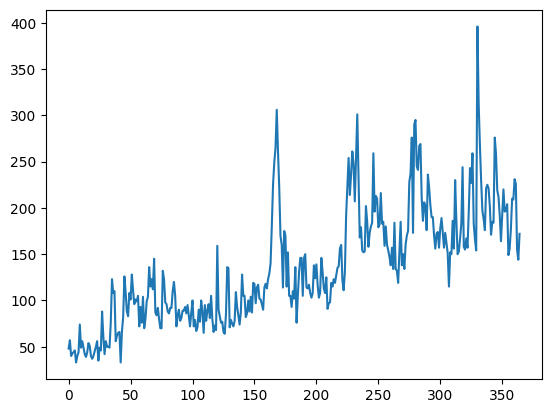

In [277]:
subs.plot()

<Axes: xlabel='lead'>

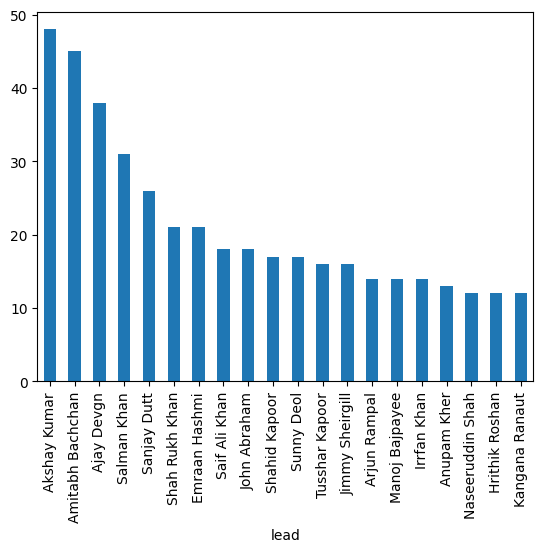

In [282]:
movies.value_counts().head(20).plot(kind = 'bar') # top 20 actors ka graphs

<Axes: ylabel='count'>

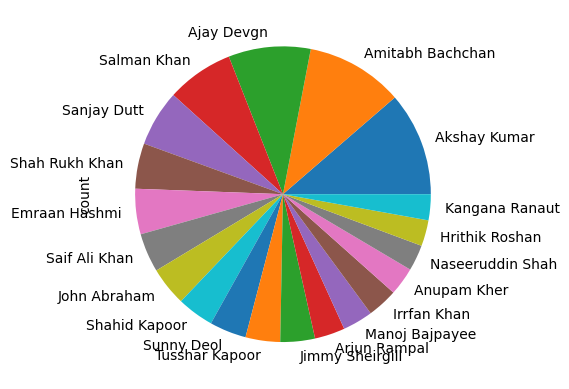

In [283]:
movies.value_counts().head(20).plot(kind = 'pie') # top 20 actors ka graphs